# Random numbers

Random numbers play important role, both in modeling physics processes (some of which are regarded as truly random, such as radioactive decay) and as a tool to tackle otherwise intractable problems.

Numbers generated on a computer are not truly random, but a good generator produces numbers that reflect the desired properties of a random variable, hence they are called truly random.

The most basic routine typically produces a random integer number $x$ between 0 and some maximum value $m$. By dividing over $m$ one can get a real pseudo-random number $\eta = x/m$ which is uniformly distributed in an interval $\eta \in [0,1)$. By applying various tranformations and techniques to the sequence of $\eta$ one can obtain various other distributions.

## Linear congruential generator

Historically, one of the simplest generators is linear congruential generator (LCG).
Although it should not be used in practice, it illustrates some of the key concepts and issues.

It generates a sequence of pseudo-random numbers in accordance with an iterative procedure
$$
x_{n+1} = (a x_n + c) ~ \text{mod} ~ m,
$$
for some parameters $a,x,m$.

It is clear that the next number only depends on the present value, and that the sequence of numbers will be periodic, with a period of at most $m$.

In [1]:
import numpy as np

# Linear congruential generator

# Parameters (based on Numerical Recipes)
lcg_a = 1664525
lcg_c = 1013904223
lcg_m = 4294967296
# Current value (initial seed)
lcg_x = 1

def lcg():
    global lcg_x
    lcg_x = (lcg_a * lcg_x + lcg_c)%lcg_m
    return lcg_x

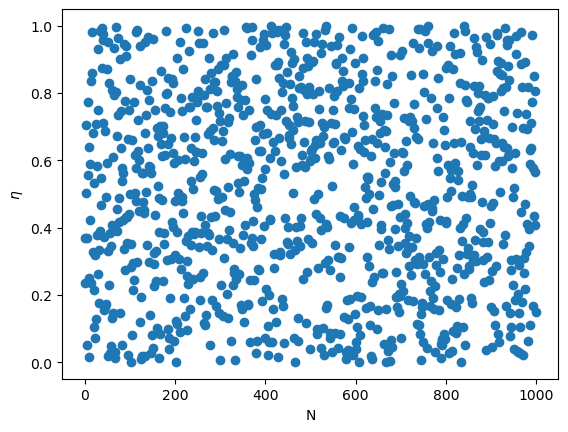

In [2]:
# Plot
import matplotlib.pyplot as plt

results = []

N = 1000
for i in range(N):
    results.append(lcg()/lcg_m)
    
plt.xlabel("N")
plt.ylabel("${\eta}$")
plt.plot(results,"o")
plt.show()

Apart from rather short period, LCG also typically generates numbers across a hyperplane (rather than the full space), if random numbers are to be regarded as components $(x,y,z,...)$ of a vector.

For a good choice parameters and small dimension this issue maybe less visible:

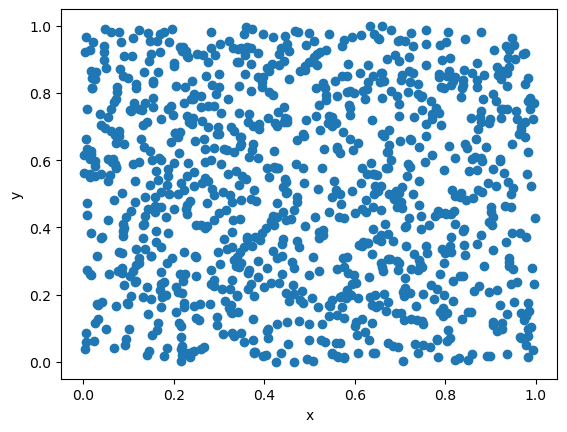

In [3]:
# 2D plot

resultsx = []
resultsy = []

N = 1000
for i in range(N):
    resultsx.append(lcg()/lcg_m)
    resultsy.append(lcg()/lcg_m)
    
plt.plot(resultsx,resultsy,"o")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

but for other parameters the artefacts are clearly visible already in 2D:

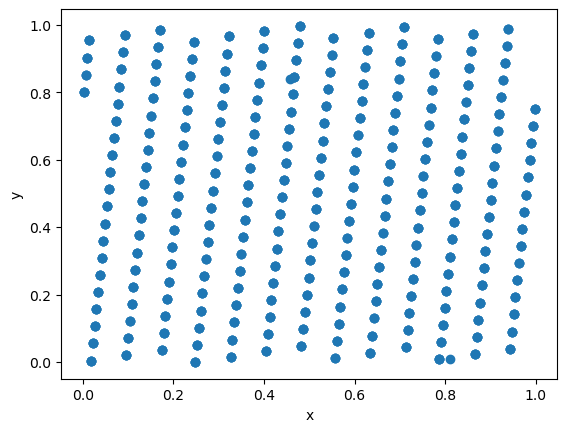

In [4]:
# Slightly different choice of m
lcg_m = 3000000000

resultsx = []
resultsy = []

N = 1000
for i in range(N):
    resultsx.append(lcg()/lcg_m)
    resultsy.append(lcg()/lcg_m)
    
plt.plot(resultsx,resultsy,"o")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

For this reason LCG is not and should not be used in any serious calculations.

Other methods have been developed over the years and the general method of choice is **Mersenne Twister** random number generator which is implemented by default in many programming environments. It has a long period of $2^{19937} - 1$, passes most statistical randomness tests, fast, and suitable for most physical applications.

We will not reimplement it but take it for granted.

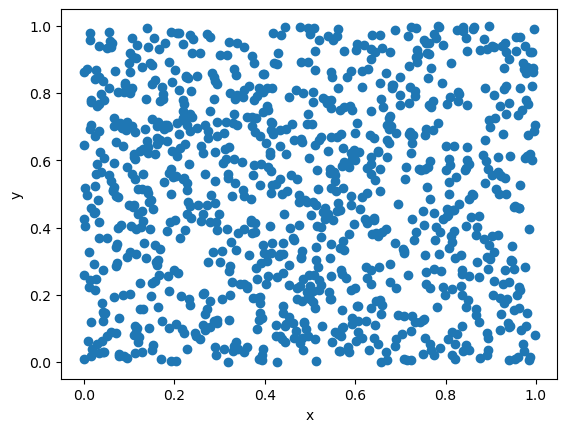

In [5]:
# Use Mersenne Twister
import numpy as np

np.random.rand() # Random number \eta uniformly distributed over (0,1)

resultsx = []
resultsy = []

N = 1000
for i in range(N):
    resultsx.append(np.random.rand())
    resultsy.append(np.random.rand())
    
plt.plot(resultsx,resultsy,"o")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Pseudo-random number generators are iterative constructs that generate a pre-determined sequence of numbers from an initial state. The initial state can be changes by modifying the seed value.

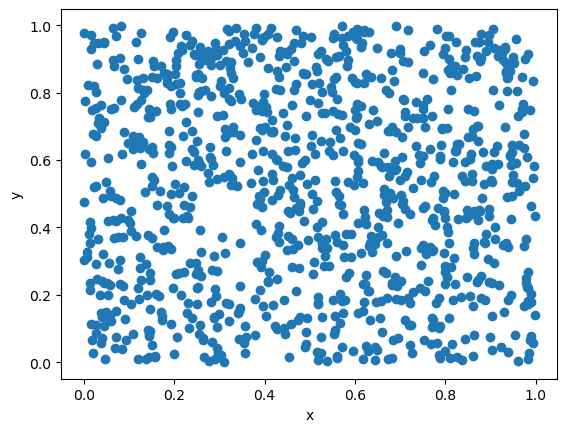

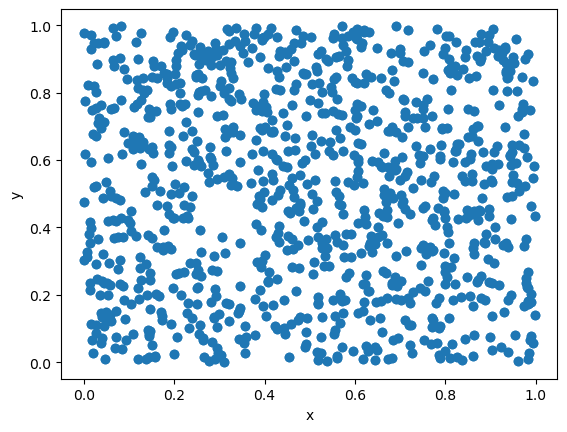

In [6]:
resultsx = []
resultsy = []

N = 1000
np.random.seed(1)
for i in range(N):
    resultsx.append(np.random.rand())
    resultsy.append(np.random.rand())
    
plt.plot(resultsx,resultsy,"o")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

np.random.seed(1)
for i in range(N):
    resultsx.append(np.random.rand())
    resultsy.append(np.random.rand())
    
plt.plot(resultsx,resultsy,"o")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Deterministic nature for a specified seed is useful for debugging the code, since the sequence of pseudo-random numbers can be guaranteed to be the same, and the error will thus be reproduced each time.

In production runs (e.g. on a cluster) one has to make sure that different seed (or better yet, different entire state) is used for each run

## Simulation example: Radioactive decay
*Example 10.1*

Some physical processes are truly random (recall quantum mechanics), for instance radiactive decay.

The number of radioactive isotopes with a half-life of $\tau$ evolves as

$$
N(t) = N(0) 2^{-t/\tau},
$$

therefore, the probability for a single atom to decay over the time interval $t$ is 

$$
p(t) = 1 - 2^{-t/\tau}.
$$

Let us simulate the time evolution for a sample of thallium atoms decaying (half-life of $\tau = 3.053$ minutes) into lead atoms.

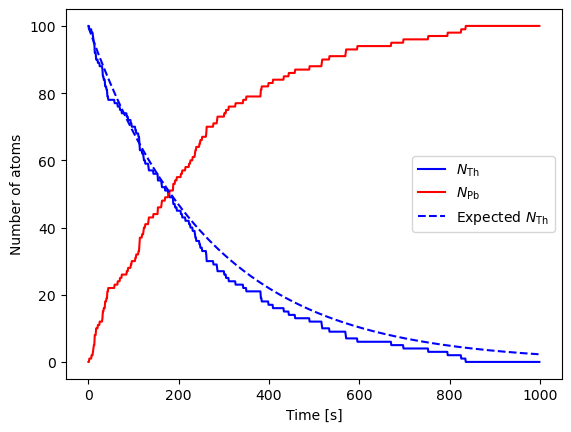

In [7]:
# Decay constants
NTl = 100            # Number of thallium atoms
NPb = 0               # Number of lead atoms
tau = 3.053*60        # Half life of thallium in seconds
h = 1.0               # Size of time-step in seconds
p = 1 - 2**(-h/tau)   # Probability of decay in one step
tmax = 1000           # Total time
ctime = 0             # Current time

# Lists of plot points
tpoints = np.arange(0.0,tmax,h)
Tlpoints = []
Pbpoints = []
TlpointsTh = [] # Expected number

# Main loop
for t in tpoints:
    Tlpoints.append(NTl)
    Pbpoints.append(NPb)

    # Calculate the number of atoms that decay
    decay = 0
    for i in range(NTl):
        if np.random.rand()<p:
            decay += 1
    NTl -= decay
    NPb += decay
    
    ctime += h
    TlpointsTh.append((NTl + NPb) * 2**(-ctime/tau))
    

# Make the graph
plt.plot(tpoints,Tlpoints,color='b',label="${N_{\\rm Th}}$")
plt.plot(tpoints,Pbpoints,color='r',label="${N_{\\rm Pb}}$")
plt.plot(tpoints,TlpointsTh,linestyle='--',color='b',label="Expected ${N_{\\rm Th}}$")
plt.xlabel("Time [s]")
plt.ylabel("Number of atoms")
plt.legend()
plt.show()

Increase the number of atoms

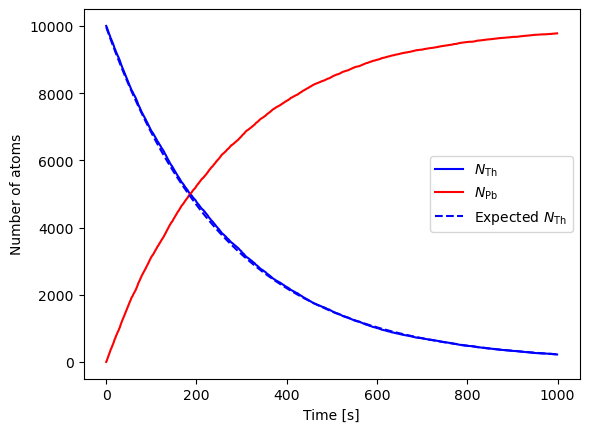

In [8]:
# Decay constants
NTl = 10000            # Number of thallium atoms
NPb = 0               # Number of lead atoms
tau = 3.053*60        # Half life of thallium in seconds
h = 1.0               # Size of time-step in seconds
p = 1 - 2**(-h/tau)   # Probability of decay in one step
tmax = 1000           # Total time
ctime = 0             # Current time

# Lists of plot points
tpoints = np.arange(0.0,tmax,h)
Tlpoints = []
Pbpoints = []
TlpointsTh = [] # Expected number

# Main loop
for t in tpoints:
    Tlpoints.append(NTl)
    Pbpoints.append(NPb)

    # Calculate the number of atoms that decay
    decay = 0
    for i in range(NTl):
        if np.random.rand()<p:
            decay += 1
    NTl -= decay
    NPb += decay
    
    ctime += h
    TlpointsTh.append((NTl + NPb) * 2**(-ctime/tau))
    

# Make the graph
plt.plot(tpoints,Tlpoints,color='b',label="${N_{\\rm Th}}$")
plt.plot(tpoints,Pbpoints,color='r',label="${N_{\\rm Pb}}$")
plt.plot(tpoints,TlpointsTh,linestyle='--',color='b',label="Expected ${N_{\\rm Th}}$")
plt.xlabel("Time [s]")
plt.ylabel("Number of atoms")
plt.legend()
plt.show()

## Brownian motion

Brownian motion is a motion of a particle in a gas and buffered by collisions with the gas particles.
We can consider a simplified 2D motion of particle by randomly making a small step at each iterations in one of the four directions.

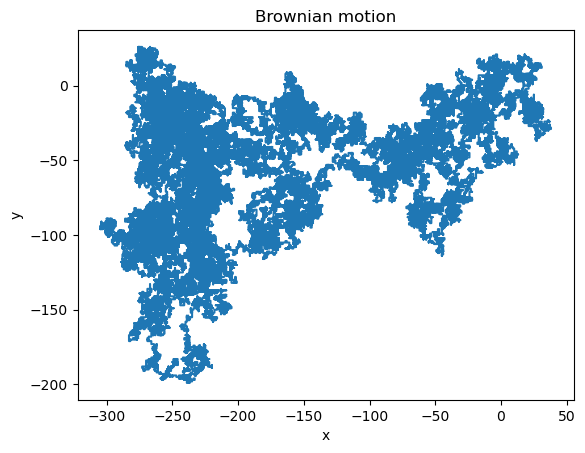

In [9]:
N = 100000
x = 0
y = 0

dirs = [ [1,0], [-1,0], [0,1], [0,-1] ]

points_x = [x]
points_y = [y]
for i in range(N):
    direction = np.random.randint(4)
    x += dirs[direction][0]
    y += dirs[direction][1]
    points_x.append(x)
    points_y.append(y)
    
plt.title("Brownian motion")
plt.plot(points_x,points_y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Computing an integral as area under the curve

Recall the interpratation of a definite integral as the area under the curve.
We can use this interpretation to apply random numbers for approximating integrals.
Consider

$$
I = \int_0^\pi \sin(x) dx
$$

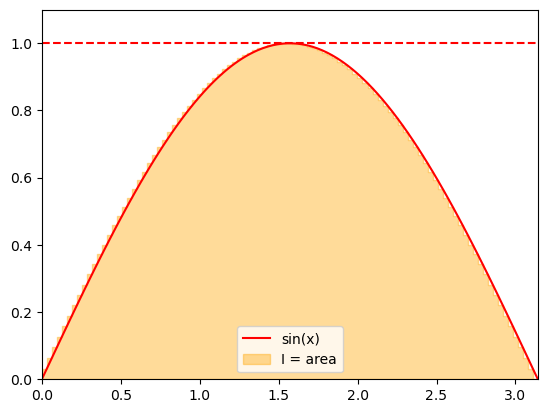

In [10]:
def f(x):
    return np.sin(x)

xplot = np.linspace(0,np.pi, 100)
yplot = f(xplot)

plt.xlim(0,np.pi)
plt.ylim(0,1.1)
plt.plot(xplot, yplot,color='r',label="sin(x)")
plt.fill_between(xplot, yplot, step="pre", alpha = 0.4, color='orange',label="I = area")
plt.axhline(1.0,linestyle='--', color='r')
plt.legend()
plt.show()

We can estimate the area by sampling the points uniformly from an enveloping rectangle and counting the fraction of points under the curve given by the integrand $f(x)$.

Assuming an integral

$$
I = \int_a^b f(x) dx
$$

where $f(x) \geq 0$ and $f(x) \leq y_{\rm max}$, the integrand can be evaluated as

$$
I = (b-a)   y_{\rm max} \frac{C}{N},
$$

where $C$ is the number of the sampled points that fall under $f(x)$.

The statistical error of the integrand can be estimated using the properties of the binomial distribution with $p = C/N$:

$$
\delta I = (b-a) y_{\rm max} \sqrt{\frac{p(1-p)}{N}}
$$

I =  2.0451768174869556  +-  0.04735360863042119


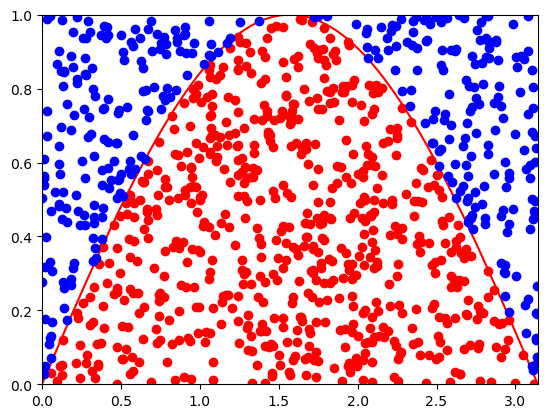

In [11]:
# For visualization
points_in = []
points_out = []

# Compute integral \int_a^b f(x) dx as an area below the curve
# Assumes that f(x) is non-negative and bounded from above by ymax
# Returns the value of the integral and the error estimate
def areaMC(f, N, a, b, ymax):
    global points_in, points_out
    points_in = []
    points_out = []
    count = 0
    for i in range(N):
        x = a + (b-a)*np.random.rand()
        y = ymax * np.random.rand()
        if y<f(x):
            count += 1
            points_in.append([x,y])
        else:
            points_out.append([x,y])
    p = count/N
    return (b-a) * ymax * p, (b-a) * ymax * np.sqrt(p*(1-p)/N)
        

def f(x):
    return np.sin(x)


N = 1000
I, err = areaMC(f, N, 0, np.pi, 1)
print("I = ",I," +- ",err)


xpoints = np.arange(0,np.pi,0.01)
plt.xlim(0,np.pi)
plt.ylim(0,1)
plt.plot(xpoints, f(xpoints),color='r')
x1 = [x[0] for x in points_in]
y1 = [x[1] for x in points_in]
plt.plot(x1,y1,'o',color='r')
x2 = [x[0] for x in points_out]
y2 = [x[1] for x in points_out]
plt.plot(x2,y2,'o',color='b')
plt.show()

In [12]:
0.23 / np.sqrt(10)

np.float64(0.07273238618387272)

## Computing  $\pi$

Consider a circle of a unit radius $r = 1$. Its area is

$$
A = \pi r^2 = \pi
$$

The circle can be embedded into a square with the side length of two.
The area of the square is $A_{\rm sq} = 2^2 = 4$.

Consider now a random point anywhere inside the square. The probability that it is also inside the circle corresponds to the ratio of their areas

$$
P = \frac{A}{A_{\rm sq}} = \frac{\pi}{4}.
$$

This probability can be estimated by sampling the points inside the square many times and counting how many of them are inside circle. $\pi$ can therefore be estimated as

$$
\pi = 4 \frac{A}{A_{\rm sq}}
$$

pi =  3.13944  +-  0.005197765372157538


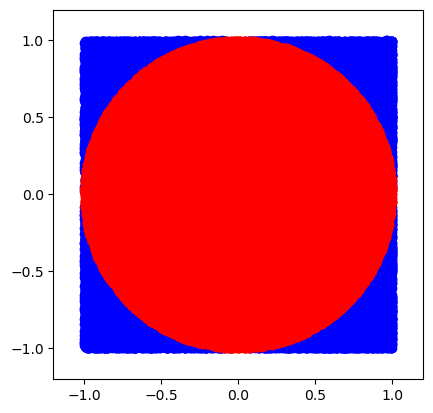

In [13]:
# Compute the value of \pi through the fraction of random points inside a square
# that are also inside a circle around the origin
# Returns the value of the integral and the error estimate
def piMC(N):    
    global points_in, points_out
    points_in = []
    points_out = []
    count = 0
    for i in range(N):
        x = -1 + 2 * np.random.rand()
        y = -1 + 2 * np.random.rand()
        r2 = x**2 + y**2
        if (r2 < 1.):
            count += 1
            points_in.append([x,y])
        else:
            points_out.append([x,y])
    p = count/N
    return 4. * p, 4. * np.sqrt(p*(1-p)/N)
        

N = 100000
piMC, piMCerr = piMC(N)
print("pi = ",piMC," +- ",piMCerr)

xpoints = np.arange(0,np.pi,0.01)
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)

xcircle= [np.cos(phi) for phi in np.arange(0.,2*np.pi,0.1)]
ycircle= [np.sin(phi) for phi in np.arange(0.,2*np.pi,0.1)]
plt.plot(xcircle,ycircle,color='r')

x2 = [x[0] for x in points_out]
y2 = [x[1] for x in points_out]
plt.plot(x2,y2,'o',color='b')
x1 = [x[0] for x in points_in]
y1 = [x[1] for x in points_in]
plt.plot(x1,y1,'o',color='r')
plt.gca().set_aspect('equal')
plt.show()

## Computing integral as the average

An integral

$$
I = \int_a^b f(x) dx
$$

corresponds to the mean value $\langle f \rangle$ over $(a,b)$

$$
\langle f \rangle = \frac{\int_a^b f(x) dx}{b - a} = \frac{I}{b-a},
$$

so that

$$
I = (b-a) \langle f \rangle
$$

The integral can therefore be estimated by evaluating $\langle f \rangle$ as the average value of $f(x)$ obtained through random sampling of the variable $x$ uniformly over the interval $(a,b)$:

$$
\langle f \rangle = \frac{1}{N} \sum_{i=1}^N f(x_i).
$$

The error estimate comes from the law of averages and involves the estimate of $\langle f^2 \rangle$

$$
\delta I = (b-a) \sqrt{\frac{\langle f^2 \rangle - \langle f \rangle^2}{N}}
$$

In [14]:
# Compute integral \int_a^b f(x) dx as an average of f(x) over the interval (a,b)
# Returns the value of the integral and the error estimate
def intMC(f, N, a, b):
    total = 0
    total_sq = 0
    for i in range(N):
        x = a + (b-a)*np.random.rand()
        fval = f(x)
        total += fval
        total_sq += fval * fval
    f_av = total / N
    fsq_av = total_sq / N 
    return (b-a) * f_av, (b-a) * np.sqrt((fsq_av - f_av*f_av)/N)
        

def f(x):
    return np.sin(x)

N = 1000
I, err = intMC(f, N, 0, np.pi)
print("I = ",I," +- ",err)

I =  2.0238547377310927  +-  0.029430579356107937


## Another way to compute $\pi$

Consider an integral
$$
4 \int_0^1 \frac{1}{1+x^2} dx = \left. 4 \arctan(x) \right|^1_0 = \pi
$$

In [15]:
def fpi(x):
    return 4 / (1 + x**2)

N = 1000
I, err = intMC(fpi, N, 0, 1)
print("pi = ",I," +- ",err)

pi =  3.120397125394039  +-  0.02038793077097405


## Integrals in multiple dimensions

Monte Carlo methods really shine when it comes to numerical evaluation of integrals in multiple dimensions.
Consider the following $D$-dimensional integral

$$
I = \int_{a_1}^{b_1} d x_1 \ldots \int_{a_D}^{b_D} d x_D f(x_1,\ldots,x_D).
$$

Computing it numerically using, for instance, the rectangle rule would involves the evaluation of multi-dimensional sum

$$
I \approx \sum_{k_1 = 1}^{N_1} \ldots \sum_{k_D = 1}^{N_D} f(x_{k_1},\ldots,x_{k_D}) \prod_{d=1}^D h_d,
$$

where $h_d = (b_d - a_d)/N_d$ and $x_{k_d} = a_d + h_d (k_d - 1/2)$.

The total number of integrand evalutions is $N_{\rm tot} = \prod_{d=1}^D N_D$, e.g. if we use the same number $N$ of points in each dimension, it scales exponentially with $D$,

$$
N_{\rm tot} = N^D,
$$

making the method impractical for large number of dimensions.

In [16]:
# Composite rectangle rule for evaluating a multi-dimensional integral
def rectangle_rule_multi(f, Nrect, a, b):
    xks = []
    hs = []
    toth = 1
    dim = len(Nrect)
    
    multi_index_max = 1
    for idim in range(dim):
        multi_index_max *= Nrect[idim]
        h = (b[idim] - a[idim]) / Nrect[idim]
        hs.append(h)
        toth *= h
        xk = []
        for k in range(Nrect[idim]):
            xk.append(a[idim] + h * (k - 1./2.))
        xks.append(xk)
        
    ret = 0.
    for multiindex in range(multi_index_max):
        cindex = multiindex
        x = []
        for idim in range(dim):
            index = cindex % Nrect[idim]
            x.append(xks[idim][index])
            cindex = cindex // Nrect[idim]
        
        ret += f(x)
    
    ret *= toth
    
    return ret

Let us consider the following integral as an example
$$
I = \int_0^{\pi/2} d x_1 \ldots \int_{0}^{\pi/2} d x_D \, \sin(x_1 + x_2 + \ldots + x_D).
$$

We can evaluate this integral analytically through an iterative procedure for any finite $D$.
The first few results are

| D | I = |
| -------- | -------- |
| 1 | 1  |
| 2 | 2  |
| 3 | 2  |
| 4 | 0  |
| 5 | -4  |
| 6 | -8  |

#### Rectangle rule

Applying the rectangle rule we get

In [17]:
%%time

def f(x):
    xsum = 0
    for i in range(len(x)):
        xsum += x[i]
    return np.sin(xsum)

Ndimmax = 4

for Ndim in range(1,Ndimmax + 1):
    Nrect = [50 for i in range(Ndim)]
    a = [0. for i in range(Ndim)]
    b = [np.pi/2 for i in range(Ndim)]
    I = rectangle_rule_multi(f,Nrect,a,b)
    print("D =",Ndim, " I =",I)

D = 1  I = 0.9681356137777438
D = 2  I = 1.9962176337747817
D = 3  I = 2.1796094400043926
D = 4  I = 0.5014154076818487
CPU times: user 7.11 s, sys: 49.4 ms, total: 7.16 s
Wall time: 7.18 s


We can only make $N$ so large when we go to higher dimensions without calculation becoming unfeasible.
As a result, calculating the integral for $D \gtrsim 4$ even with moderate accuracy becomes challenging.

### Monte Carlo way 

Monte Carlo techniques, on the other hand, are not plagued by the curse of dimensionality.
The integral can be approximated by computing the mean value of the integrand in $D$-dimensional space
$$
I = \langle f(x_1,\ldots,x_D) \rangle \prod_{k=1}^D (b_k-a_k).
$$
Here $x_1,\ldots,x_D$ are independent random variables distributed uniformly in intervals $x_k \in [a_k,b_k]$.
Adding one more dimension thus only entails sampling one more number for each sample.
Thus the complexity of the method is linear in $D$ as opposed to the exponential complexity of other methods.

Error estimate
$$
\delta I = \sqrt{\frac{\langle f^2 \rangle - \langle f \rangle^2}{N}} \, \prod_{k=1}^D (b_k-a_k),
$$
scales with $1/\sqrt{N}$ as before.

In [39]:
# Evaluating a multi-dimensional integral
# by sampling uniformly distributed numbers
# and calculating the average of the integrand
def intMC_multi(f, nMC, a, b):
    dim = len(a)
    
    total = 0
    total_sq = 0
    for iMC in range(nMC):
        x = [a[idim] + (b[idim] - a[idim]) * np.random.rand() for idim in range(dim)]
        fval = f(x)
        total += fval
        total_sq += fval * fval
        
    f_av = total / nMC
    fsq_av = total_sq / nMC 
    
    vol = 1.
    for idim in range(dim):
        vol *= (b[idim] - a[idim])
        
    return vol * f_av, vol * np.sqrt((fsq_av - f_av*f_av)/nMC)

In [40]:
%%time

def f(x):
    xsum = 0
    for i in range(len(x)):
        xsum += x[i]
    return np.sin(xsum)

Ndimmax = 10
NMC = 1000000
for Ndim in range(1,Ndimmax + 1):
    a = [0. for i in range(Ndim)]
    b = [np.pi/2 for i in range(Ndim)]
    I, Ierr = intMC_multi(f,NMC,a,b)
    print("D =",Ndim, " I =",I,"+-",Ierr)

D = 1  I = 0.9993739322835572 +- 0.00048374555149185663
D = 2  I = 1.999673583869861 +- 0.0005271898298378077
D = 3  I = 2.000281719209202 +- 0.001873864337864639
D = 4  I = -0.005527473307926931 +- 0.0039355870900790605
D = 5  I = -4.00658532586375 +- 0.00544752767681332
D = 6  I = -7.993067705005959 +- 0.007511157283780776
D = 7  I = -8.002001902682919 +- 0.014639212383786052
D = 8  I = -0.010555898125154409 +- 0.025874692253323058
D = 9  I = 16.018663094391286 +- 0.03791332298430485
D = 10  I = 31.982668453813293 +- 0.05662481958581747
CPU times: user 22.8 s, sys: 533 ms, total: 23.3 s
Wall time: 23.3 s


## Volume of a D-dimensional ball

Let us consider an $D$-dimensional ball of radius $R$.
Its volume is given by an $D$-dimensional integral

$$
V_D(R) = \int_{\sqrt{x_1^2+\ldots x_{D}^2} < R} d x_1 \ldots d x_D.
$$

This can be written with the recursion formula

$$
V_D(R) =  R^D \int_{-1}^1 V_{D-1} \left(\sqrt{1-t^2} \right) dt,
$$

with $V_0(R) = 1$.

Let us use the rectangle method to evalute this integral for $R = 1$.
We will have to use rectangle method recursively since the integral is multi-dimensional.

In [41]:
# Computes volume of a D-dimensional ball
# using a recursion relation and rectangle rule
# with nrect slices for each dimension
def VD(D, R, nrect):
    if (D == 0):
        return 1.
    
    ret = 0.
    h = 2. / nrect;
    for k in range(nrect):
        xk = -1. + h * (k+1/2.)
        ret += VD(D-1,np.sqrt(1-xk**2), nrect)
    ret *= h * R**D
    return ret

In [43]:
%%time

nrect = 50
for n in range(6):
    print("V",n,"(1) = ",VD(n,1,nrect))

V 0 (1) =  1.0
V 1 (1) =  2.0
V 2 (1) =  3.144340711294003
V 3 (1) =  4.193292772581682
V 4 (1) =  4.940233310235603
V 5 (1) =  5.2695829353261505
CPU times: user 2min 39s, sys: 3.58 s, total: 2min 42s
Wall time: 2min 42s


The calculation, again, quickly becomes untenable in larger dimensions

This can be overcome with Monte Carlo techniques.

Here we observe that the ball $\sqrt{x_1^2+\ldots x_{n}^2} < R$ is a subvolume of a hypercube $-R < x_1,\ldots,x_D < R$.
If we will now randomly sample points that are uniformly distributed inside a hypercube,
the fraction $C/N$ of those that are also inside the ball will reflect
the ratio of the ball and hypercube volumes $V_D(R)$ and $V_{\rm cube} (R) = (2R)^D$.
Therefore,

$$
V_D(R) = (2R)^D \frac{C}{N},
$$

in the limit of large $N$.

In [44]:
def VD_MC(D, R, N = 100):
    if (D == 0):
        return 1., 0., 1.
    count = 0
    for iMC in range(N):
        xs = [-R + 2 * R * np.random.rand() for i in range(n)]
        r2 = 0.
        for i in range (D):
            r2 += xs[i]**2
        if (r2 < R**2):
            count += 1
        
    p = count/N
    return (2*R)**D * p, (2*R)**D * np.sqrt(p*(1-p)/N), p

V 0 (1) =  1.0 +- 0.0
V 1 (1) =  2.0 +- 0.0
V 2 (1) =  3.142232 +- 0.0023217691780950144
V 3 (1) =  4.195456 +- 0.005650096804845737
V 4 (1) =  4.948736 +- 0.010458469104252686
V 5 (1) =  5.276672 +- 0.016793465193605278
V 6 (1) =  5.12192 +- 0.024558860540082068
V 7 (1) =  4.740864 +- 0.034186394970324205
V 8 (1) =  4.066816 +- 0.045267337090271705
V 9 (1) =  3.279872 +- 0.057767411291551156
V 10 (1) =  2.52928 +- 0.07188303642281119
V 11 (1) =  1.8432 +- 0.08685017229412961
V 12 (1) =  1.236992 +- 0.10064977975924176
V 13 (1) =  0.884736 +- 0.12039081820645878
V 14 (1) =  0.688128 +- 0.15015868694055376
V 15 (1) =  0.32768 +- 0.14654221825683955


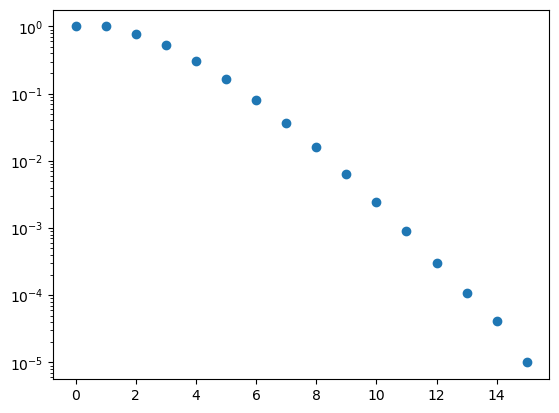

CPU times: user 21.2 s, sys: 511 ms, total: 21.7 s
Wall time: 21.5 s


In [45]:
%%time

nMC = 500000
ds = []
ps = []
for n in range(16):
    Vnval, Vnerr, p = VD_MC(n, 1, nMC)
    print("V",n,"(1) = ",Vnval, "+-", Vnerr)
    ds.append(n)
    ps.append(p)
    
plt.plot(ds,ps,"o")
plt.yscale("log")
plt.show()

## Nonuniformly distributed random numbers

In many cases we deal with random numbers $\xi$ that are distributed non-uniformly.
Common examples are:
- Exponential distribution $\rho(x) = e^{-x}$.
- Gaussian distribution $\rho(x) \propto e^{-\frac{x^2}{2\sigma^2}}$.
- Power-law distribution $\rho(x) \propto x^{\alpha}$.
- Arbitrary peaked distributions.

There are two common methods for generating nonunifrom random variates.
They both make use of uniformly distributed variates.

## Inverse transform sampling

The basic idea is that if $\eta$ is a uniformly distibuted random variable, some function of it, $\xi = f(\eta)$, is not. The idea is to sample $\eta$ and calculate $\xi$ via this function such that $\xi$ corresponds to a desired probability density $\rho(\xi)$. How to find the function $f(\eta)$?

Without the loss of generality assume that $\xi \in (-\infty, \infty)$ and that $f(\eta)$ maps $\eta$ to $\xi$ such that $f(0) \to -\infty$. Consider now the cumulative distribution function 

$$G(x) = Pr(\xi < x) = \int_{-\infty}^x \rho(\xi) d\xi.$$ 

It corresponds to the probability that $\eta < y$ where $y$ is such that $x = f(y)$. Since $\eta$ is uniformly distributed, this probablity equals to $y$. Therefore,

$$
G[x = f(y)] = y,
$$

thus

$$
f(y) = G^{-1}(y).
$$

If we can calculate the inverse of $G^{-1}(y)$ of the cumulative distribution function for $\xi$, we are good.

The algorithm is the following:
1. Calculate the cumulative distribution

$$
G(x) = \int_{-\infty}^x \rho(\xi) d\xi
$$

2. Find the inverse function $G^{-1}(y)$ as the solution to the equation

$$
G(x) = y
$$

with respect to $x$.
3. Sample uniformly distributed randon variables $\eta$ and calculate $\xi = G^{-1}(\eta)$

Sometimes, evaluating $G(x)$ and/or $G^{-1}(y)$ explicitly is challenging.
In such cases one would resort to numerical integration and/or non-linear equation solvers.

### Example: Exponential distribution

Recall the radioactive decay process. The time of decay is distributed in accordance with
$$
\rho(t) = \frac{1}{\tau} e^{-\frac{t}{\tau}}.
$$

The cumulative distibution function reads
$$
F(x) = \int_0^{x} \frac{1}{\tau} e^{-\frac{t}{\tau}} dt = 1 - e^{-\frac{x}{\tau}}.
$$
To apply inverse transform sampling we have to invert $F(x)$ by solving the equation
$$
1 - e^{-\frac{t}{\tau}} = \eta.
$$
This can be done straightforwardly to give
$$
t(\eta) = -\tau \ln(1-\eta).
$$

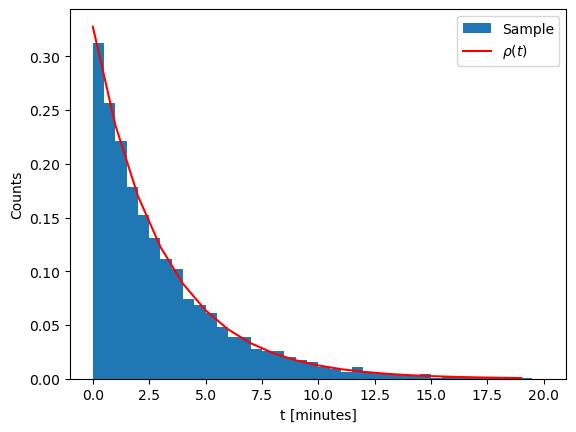

In [24]:
## Radioactive decay sampler
def sample_tdecay(tau):
    eta = np.random.rand()
    return -tau * np.log(1-eta)
    

tau = 3.053 # Half-time in minutes
N = 10000   # Number of samples
tdecays = [sample_tdecay(tau) for i in range(N)]

# Show a histogram
plt.xlabel("t [minutes]")
plt.ylabel("Counts")
plt.hist(tdecays, bins = 40, range=(0,20), density=True, label = 'Sample')
# Show true distribution
plt.plot([x for x in np.arange(0,20)], [1/tau * np.exp(-t/tau) for t in np.arange(0,20)], color='r', label='${\\rho(t)}$')
plt.legend()
plt.show() 

### Example: Points inside a circle

Let us sample points on a plane inside a unit circle.
One way to do that is to switch to polar coordinates

$$
x = r \cos(\phi), \qquad y = r \sin(\phi),
$$

and sample $r$ and $\phi$.

Since $r \in [0,1)$ and $\phi \in [0,2\pi)$,
naively one could sample $r$ and $\phi$ independently from two uniform distributions.
Let us see what happens

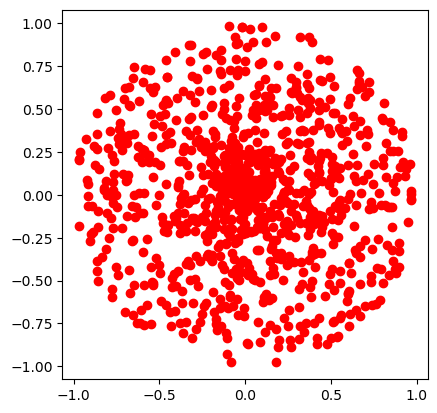

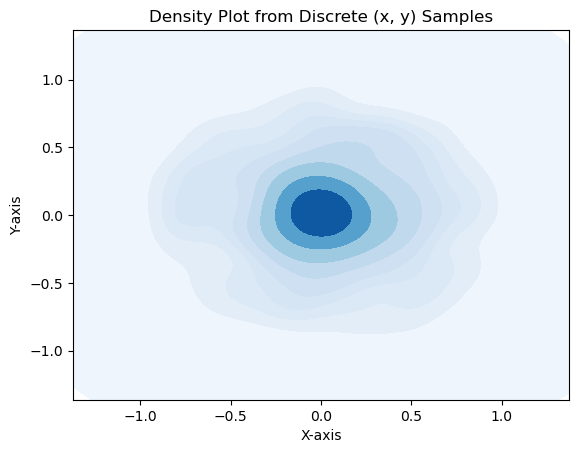

In [43]:
def sample_xy_naive():
    r = np.random.rand()
    phi = 2 * np.pi * np.random.rand()
    return r*np.cos(phi), r*np.sin(phi)

xplot = []
yplot = []
N = 1000
for i in range(N):
    x, y = sample_xy_naive()
    xplot.append(x)
    yplot.append(y)
    
plt.plot(xplot,yplot,'o',color='r')
plt.gca().set_aspect('equal')
plt.show()

# density plot
import seaborn as sns
sns.kdeplot(x=xplot, y=yplot, cmap="Blues", fill=True, thresh=0)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Density Plot from Discrete (x, y) Samples")
plt.show()

The points clump more in the centre! Why? Because $r$ is not uniformly distributed.
Recall

$$
dx dy = r dr d\phi,
$$

therefore

$$
\rho_r(r) = 2r, \qquad \rho_\phi(\phi) = \frac{1}{2\pi}.
$$

Cumulative distribution function

$$
F_r(r) = \int_0^r \rho_r(r') dr' = r^2.
$$

Solving $F_r(r) = \eta$ we get

$$
r = \sqrt{\eta}.
$$

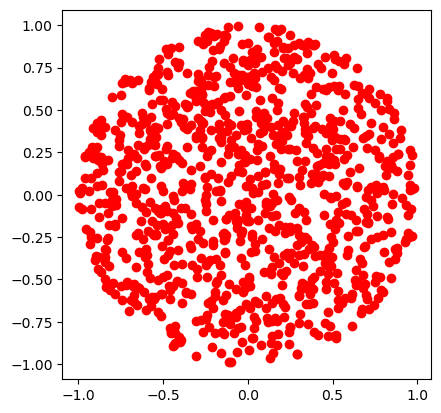

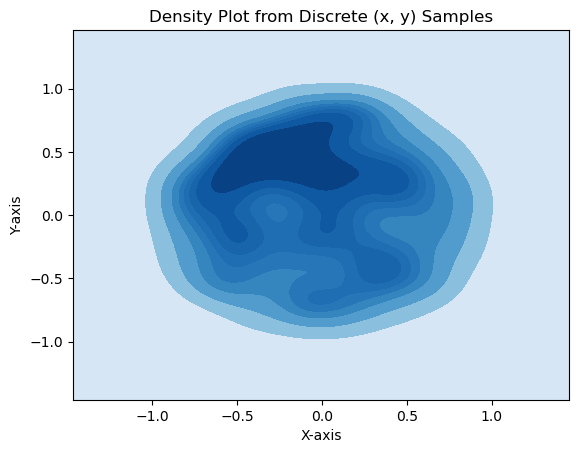

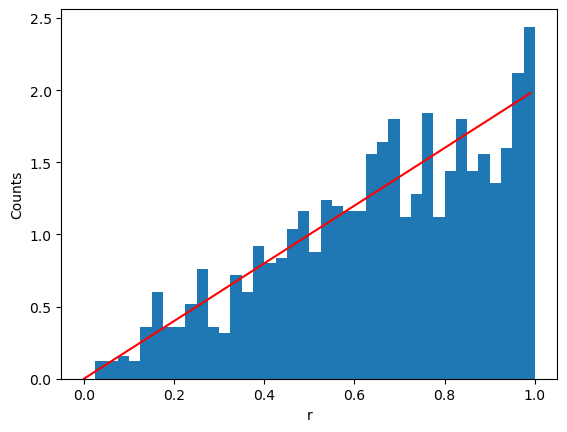

In [41]:
def sample_xy_correct():
    eta = np.random.rand()
    r = np.sqrt(eta)
    phi = 2 * np.pi * np.random.rand()
    return r*np.cos(phi), r*np.sin(phi)

xplot = []
yplot = []
rs = []
N = 1000
for i in range(N):
    x, y = sample_xy_correct()
    xplot.append(x)
    yplot.append(y)
    rs.append(np.sqrt(x*x+y*y))
    
plt.plot(xplot,yplot,'o',color='r')
plt.gca().set_aspect('equal')
plt.show()

# Show a density plot
import seaborn as sns
sns.kdeplot(x=xplot, y=yplot, cmap="Blues", fill=True, thresh=0)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Density Plot from Discrete (x, y) Samples")
plt.show()

# Show a histogram
plt.xlabel("r")
plt.ylabel("Counts")
plt.hist(rs, bins = 40, range=(0,1), density=True)
# Show true distribution
plt.plot([r for r in np.arange(0,1,0.01)], [2*r for r in np.arange(0,1,0.01)], color='r')
plt.show() 



## Sampling on a unit sphere (isotropic direction)

One common problem that occurs in Monte Carlo simulations is random sampling of an isotropic direction in 3D space.
For instance, this issue occurs when sampling a random orientation of some axially symmetric object (such as a rod) or the momentum of a particle.

This problem is equivalent to choosing a random point on a unit sphere. The coordinates $x,y,z$ on a unit sphere can be parametrized by azimuthal and polar angles, $\phi \in [0,2\pi)$ and $\theta \in [0,\pi]$:

\begin{align*}
x & = \sin(\theta) \cos(\phi),\\
y & = \sin(\theta) \sin(\phi),\\
z & = \cos(\theta).
\end{align*}

Recall that

$$
d\Omega = \sin(\theta) d \theta d\phi,
$$

thus the random variable $\phi$ and $\theta$ are independent.
$\phi$ is uniformly distributed in $[0,2\pi)$, thus, its sampling is straightforward.
However, the polar angle $\theta$ has a weighted probability density

$$
\rho_{\theta} (\theta) = \frac{1}{2} \sin(\theta),
$$

thus, its, distribution is non-uniform.
The cumulative distribution function reads

$$
F_{\theta}(\theta) = \int_0^\theta \frac{1}{2} \sin(\theta') d \theta' = \frac{1-\cos(\theta)}{2},
$$
thus
$$
\theta = \arccos(2\eta - 1).
$$

In practice, it can make sense to work directly with $\cos(\theta)$ and $\sin(\theta)$. Indeed, we have

$$
\cos(\theta) = 2 \eta - 1,
$$
and
$$
\sin(\theta) = \sqrt{1 - [\cos(\theta)]^2}
$$

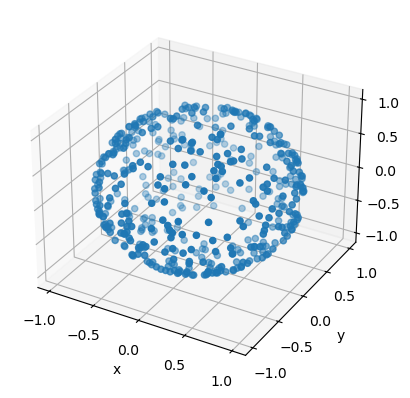

In [27]:
def sample_xyz_isotropic():
    phi = 2 * np.pi * np.random.rand()
    costh = 2 * np.random.rand() - 1
    sinth = np.sqrt(1-costh*costh)
    return sinth * np.cos(phi), sinth * np.sin(phi), costh

xplot = []
yplot = []
zplot = []
N = 500
for i in range(N):
    x, y, z = sample_xyz_isotropic()
    xplot.append(x)
    yplot.append(y)
    zplot.append(z)
    
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(xplot,yplot,zplot)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

## Sampling normally distributed variables

One of the most common distribution is the normal (or Gaussian) distribution
$$
\rho(x) = \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{(x-\mu)^2}{2\sigma^2}}.
$$

There are a lot of standard implementations of sampling this distribution. Let us go through one such method.
First, we can make a change of variable $x \to \mu + \sigma x$. The new variable then has a normal distribution with zero mean and standard deviation of unity
$$
\rho(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}}.
$$

Calculating the cumulative distribution function $F(x) = \int_{-\infty}^x \rho(x)$ is not entirely trivial.

Instead of one variable, we can consider a pair of independent normally distributed variables $x,y$:
$$
\rho(x,y) = \frac{1}{2\pi} e^{-\frac{x^2}{2}} e^{-\frac{y^2}{2}},
$$
Making a change of variables to polar coordinates
$$
x = r \cos(\phi), \qquad y = r \sin(\phi),
$$
and taking into account
$$
dx dy = r dr d\phi
$$
we get
$$
\rho(r,\phi) = \frac{1}{2\pi} r e^{-r^2/2}.
$$

Therefore, we can sample $x$ and $y$ by sampling two independent random variables $r$ and $\phi$.
$\phi$ is uniformly distributed in $[0,2\pi)$.
For $r$ we have the following probability density
$$
\rho_r(r) = r e^{-r^2/2},
$$
and the cumulative distribution function
$$
F_r(r) = \int_0^r r' e^{-r'^2/2} dr' = 1 - e^{-r^2/2},
$$
therefore
$$
r = \sqrt{-2 \ln(1-\eta)}.
$$

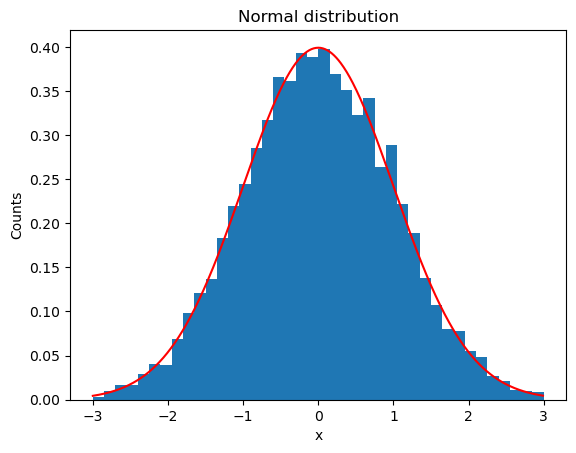

In [28]:
def sample_xy_normal():
    phi = 2 * np.pi * np.random.rand()
    eta = np.random.rand()
    r = np.sqrt(-2*np.log(1-eta))
    return r * np.cos(phi), r * np.sin(phi)

N = 10000
samples = []
for i in np.arange(0,N,2):
    x, y = sample_xy_normal()
    samples.append(x)
    samples.append(y)
    
# Show a histogram
plt.title("Normal distribution")
plt.xlabel("x")
plt.ylabel("Counts")
plt.hist(samples, bins = 40, range=(-3,3), density=True)
# Show true distribution
plt.plot([x for x in np.arange(-3,3,0.01)], [1/np.sqrt(2*np.pi)*np.exp(-x**2/2) for x in np.arange(-3,3,0.01)], color='r')
plt.show() 

## Rejection sampling

In the rejection sampling method one samples a variable $\xi$ from an envelope distribution and accepts this value with a certain probability. 

Consider the distribution function for the polar angle again:
$$
\rho_\theta(\theta) = \frac{\sin(\theta)}{2}.
$$

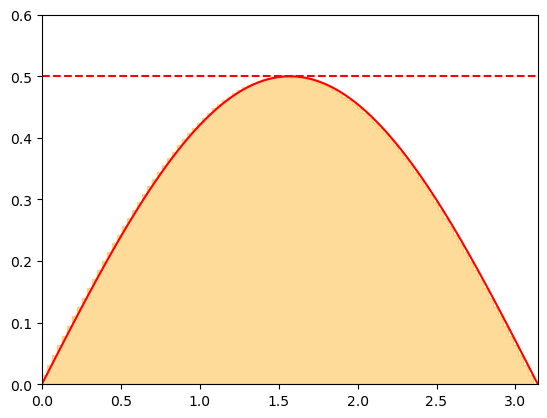

In [29]:
def rho_th(x):
    return np.sin(x) / 2

xplot = np.linspace(0,np.pi, 100)
yplot = rho_th(xplot)

plt.xlim(0,np.pi)
plt.ylim(0,0.6)
plt.plot(xplot, yplot,color='r')
plt.fill_between(xplot, yplot, step="pre", alpha = 0.4, color='orange')
plt.axhline(0.5,linestyle='--', color='r')
plt.show()

Note that $\rho_\theta$ is bounded from above $\rho_\theta < \rho_\theta^{\rm max} = 1/2$.
The rejection sampling method proceeds by
1. Sampling a candidate value $\theta_{\rm cand}$ from a uniform distribution over $(0,\pi)$.
2. Accepting the value $\theta_{\rm cand}$ with a probability $p = \rho_\theta(\theta_{\rm cand}) / \rho_\theta^{\rm max}$.

The second step can be performed by sampling $y$ as a uniform distribution over $(0,\rho_\theta^{\rm max})$ and accepting $\theta_{\rm cand}$ is $y < \rho_\theta(\theta_{\rm cand})$.

The procedure has simple geometrical interpretation. Considering $\theta_{\rm cand} \equiv x$ and $y$ to be the coordinates of a point on a plane, we accept $\theta_{\rm cand}$ for all points that lie below the curve given by the probability density $\rho_{\theta}(x)$. This ensures that the $\theta_{\rm cand}$ are accepted with a rate proprotional to $\rho_\theta(\theta)$, as desired.

One advantage of rejection sampling is that $\rho_\theta(\theta)$ need not be a normalized distribution for the method to work.

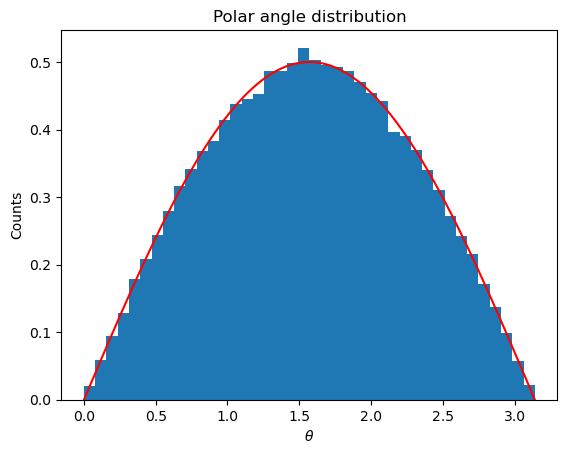

In [30]:
def sample_rejection(rho, a, b, rhomax):
    while True:
        x_cand = a + (b-a)*np.random.rand()
        y = rhomax * np.random.rand()
        if (y < rho(x_cand)):
            return x_cand
    return 0.

def rho_theta(theta):
    return np.sin(theta) / 2.

N = 100000
samples = []
for i in np.arange(0,N,1):
    theta = sample_rejection(rho_theta, 0., np.pi, 0.5)
    samples.append(theta)
    
# Show a histogram
plt.title("Polar angle distribution")
plt.xlabel("${\\theta}$")
plt.ylabel("Counts")
plt.hist(samples, bins = 40, range=(0,np.pi), density=True)
# Show true distribution
plt.plot([x for x in np.arange(0,np.pi,0.01)], [rho_theta(x) for x in np.arange(0,np.pi,0.01)], color='r')
plt.show() 

Rejection sampling has the following pros and cons

Pros:
- Does not need the distribution to be normalized
- Will also work if $y_{\rm max}$ is larger than the true maximum of $\rho(x)$
- Works for generic distributions and does not require the evaluation of cumulative distribution function

Cons:
- Can be inefficient if the rejection rate is very high (highly peaked distribution)
- Not directly applicable to distributions over infinite ranges

Generalization of rejection sampling can take care of some of the deficiencies. These include:
- Adaptive rejection sampling by considering several enveloping rectangles
- Variable transformation to map infinite interval into a finite one
- Sampling from a non-uniform enveloping distribution

## Importance sampling

Recall the calculation of integral as statistical average
$$
I = \int_a^b f(x) dx = (b - a) \langle f \rangle,
$$
where 
$$
\langle f \rangle = \frac{1}{N} \sum_{i=1}^N f(x_i),
$$
and $x_i$ are sampled from a uniform distribution over $(a,b)$, i.e.
$$
x_i \in U(a,b)
$$

In some cases, in particular, when $f(x)$ is highly peaked, only small part of the interval $(a,b)$ contributes to the total value of the integral. In this case sampling $x$ from $(a,b)$ with equal probability everywhere may be wasteful. Another issue may arise when $f(x)$ has integrable singularities. The method will still work, but the convergence rate for the statistical uncertainty can be slow.

An improvement can be obtained by applying the so-called *importance sampling* technique.
It is based on the following observation: Let $w(x)$ be the probability density for some random variable $x$.
We will assume $w(x)$ is normalized, i.e. 
$$\int_a^b w(x) dx = 1.$$
Then the mean value of an arbitrary random variable function $g(x)$ reads
$$
\langle g(x) \rangle_w = \int_a^b g(x) w(x) dx,
$$
where the subscript $w$ indicates that $x$ is distributed in accordance with probability density $w(x)$.

Let us return to our integral. Divinding and multiplying the integrand by $w(x)$ we can rewrite $I$ as
$$
I = \int_a^b \frac{f(x)}{w(x)} w(x) dx = \left\langle \frac{f(x)}{w(x)} \right\rangle_w~.
$$
The mean value $\frac{f(x)}{w(x)}$ is well-defined as long as $w(x) > 0$.
For $w(x) = \frac{1}{b-a}$ we reproduce the original method.

By choosing $w(x)$ to sample regions where the integrand $f(x)$ is most relevant, or to cancel away the integrable singularities one can significantly improve the statistical convergence of the method.


The error estimate reads in essentially the same way as for the standard case
$$
\delta I = \frac{\sqrt{\left\langle \left[\frac{f(x)}{w(x)} \right]^2 \right\rangle_w - \left\langle \frac{f(x)}{w(x)} \right\rangle_w^2}}{\sqrt{N}}.
$$

In [31]:
# Calculate integral \int_a^b f(x) dx using importance sampling
# f = f(x) is the integrand
# N is the number of random samples
# wx = w(x) is the normalized probability density from which
# the sampling takes place
# sampler is a function which samples a random number from w(x)
def intMC_weighted(f, N, wx, sampler):
    total = 0
    total_sq = 0
    for i in range(N):
        x = sampler()
        fval = f(x)
        total += fval / wx(x)
        total_sq += (fval / wx(x))**2
    fw_av = total / N
    fwsq_av = total_sq / N 
    return fw_av, np.sqrt((fwsq_av - fw_av*fw_av)/N)

### Example
Let us consider integral
$$
\int_0^1 \frac{x^{-1/2}}{e^x + 1} dx
$$
which has an integrable singularity at $x = 0$.

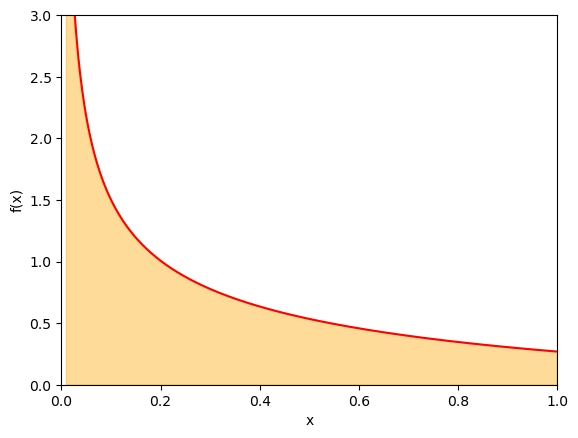

In [32]:
def f(x):
    return 1. / np.sqrt(x) / (np.exp(x) + 1)

xplot = np.linspace(0.01,1, 400)
yplot = f(xplot)

plt.xlim(0,1)
plt.ylim(0,3)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(xplot, yplot,color='r')
plt.fill_between(xplot, yplot, step="pre", alpha = 0.4, color='orange')
# plt.axhline(0.5,linestyle='--', color='r')
plt.show()

We can apply the standard mean value technique to estimate the integrand.
Let us take $N = 10^6$ samples

In [33]:
np.random.seed(1)
N = 1000000
I, err = intMC(f, N, 0, 1)
print("I = ",I," +- ",err)

I =  0.8374063441946126  +-  0.0017772180714415427


We can check that using importance sampling routine with the weight $w(x) = \frac{1}{b-a}$ will reproduce the same result.

In [34]:
def uniform_sample():
    eta = np.random.rand()
    return eta

def uniform_w(x):
    return 1.

np.random.seed(1)
N = 1000000
I, err = intMC_weighted(f, N, uniform_w, uniform_sample)
print("I = ",I," +- ",err)

I =  0.8374063441946126  +-  0.0017772180714415427


Although the method works, the convergence is rather slow. Can we improve upon it?

Let us choose the weight function such that it cancels out the singularity in the ratio $f(x)/w(x)$.
A natural choice here is
$$
w(x) = \frac{1}{2\sqrt{x}},
$$
such that $f(x)/w(x) = 2 / (e^x + 1)$ and thus
$$
I = \left\langle \frac{2}{e^x + 1} \right\rangle_w~.
$$

We can sample from $w(x)$ through the inverse transform method.
The cumulative distribution function reads
$$
G_w(x) = \int_0^x w(x) = \sqrt{x} = \eta,
$$
thus,
$$
x = \eta^2.
$$

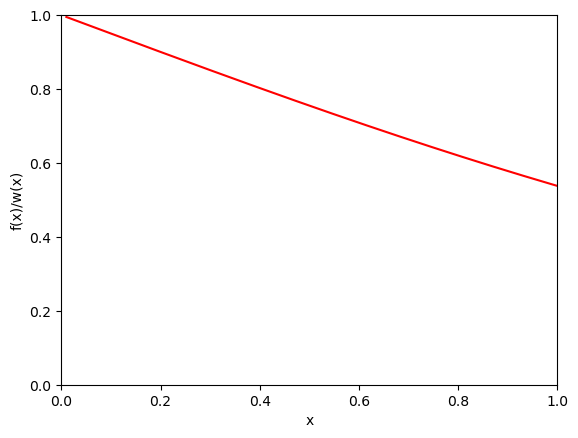

In [35]:
def rsqrt_sample():
    eta = np.random.rand()
    return eta * eta

def rsqrt_w(x):
    return 1. / (2. * np.sqrt(x))

xplot = np.linspace(0.01,1, 400)
yplot = [f(x) / rsqrt_w(x) for x in xplot]

plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("x")
plt.ylabel("f(x)/w(x)")
plt.plot(xplot, yplot,color='r')
plt.show()

Notice that $f(x)/w(x)$ has much smaller variation than $f(x)$ over $(0,1)$.
In general, the smoother one can make $f(x)/w(x)$, the smaller statistical error of the calculation would be.

Let us calculate the integral with using importance sampling with the same number of samples.

In [36]:
N = 1000000
I, err = intMC_weighted(f, N, rsqrt_w, rsqrt_sample)
print("I = ",I," +- ",err)

I =  0.839014917136739  +-  0.0001409071521618816


Notice that the statistical error is more than x10 smaller than the direct method.
We would need more than x100 samples in the direct method to reach the same accuracy as importance sampling in this case.